# <div align="center"><span style="color:#1A489B"> <h2> Data understanding </h2></span></div>


<h3 style="color: dodgerblue;">"CATEGORY" Feature:</h3>

Description: The "CATEGORY" feature is  the label indicating whether a message is spam or non-spam.

Values : 1 for spam , 0 for non-spam

<h3 style="color: dodgerblue;">"MESSAGE" Feature:</h3>

Description: The "MESSAGE" feature contains the text content of the messages

<h3 style="color: dodgerblue;">"FILE_NAME" Feature:</h3>

Description: The "FILE_NAME" feature likely serves as an identifier for each file in the dataset.

 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [3]:
data=pd.read_csv('Spam_Email.csv')


In [4]:
# View the 5 first rows of the dataset

In [5]:
data.head()

,CATEGORY,MESSAGE,FILE_NAME
0,1,"Dear Homeowner,\n\n \n\nInterest Rates are at ...",00249.5f45607c1bffe89f60ba1ec9f878039a
1,1,ATTENTION: This is a MUST for ALL Computer Use...,00373.ebe8670ac56b04125c25100a36ab0510
2,1,This is a multi-part message in MIME format.\n...,00214.1367039e50dc6b7adb0f2aa8aba83216
3,1,IMPORTANT INFORMATION:\n\n\n\nThe new domain n...,00210.050ffd105bd4e006771ee63cabc59978
4,1,This is the bottom line. If you can GIVE AWAY...,00033.9babb58d9298daa2963d4f514193d7d6


In [6]:
# Types des features 

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5796 entries, 0 to 5795
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   CATEGORY   5796 non-null   int64 
 1   MESSAGE    5796 non-null   object
 2   FILE_NAME  5796 non-null   object
dtypes: int64(1), object(2)
memory usage: 136.0+ KB


In [8]:
# Check the summary statistics of the dataset

In [9]:
data.shape

(5796, 3)

In [10]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CATEGORY,5796.0,0.327122,0.469203,0.0,0.0,0.0,1.0,1.0


In [11]:
data.isnull().sum()

CATEGORY     0
MESSAGE      0
FILE_NAME    0
dtype: int64

In [12]:
duplications = data[data.duplicated()]

total_duplications = len(duplications)
print(f"Nombre total de duplications : {total_duplications}")

Nombre total de duplications : 0


In [13]:
# Describe of Target : 

In [14]:
data.CATEGORY.value_counts()

CATEGORY
0    3900
1    1896
Name: count, dtype: int64

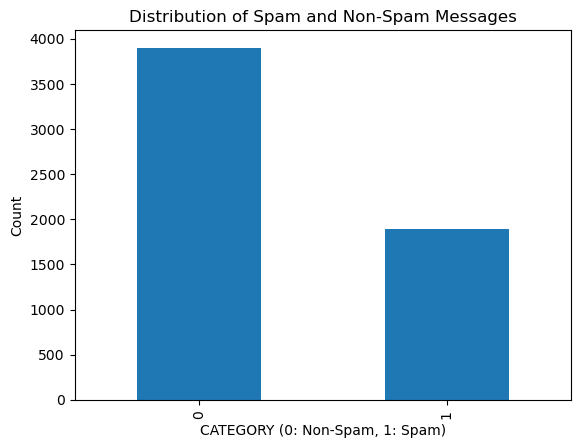

In [15]:
data['CATEGORY'].value_counts().plot.bar()
plt.title('Distribution of Spam and Non-Spam Messages')
plt.xlabel('CATEGORY (0: Non-Spam, 1: Spam)')
plt.ylabel('Count')
plt.show()

In [16]:
data.groupby(data['CATEGORY']).describe()

MESSAGE                                                            \
           count unique                                                top   
CATEGORY                                                                     
0           3900   3862  URL: http://www.askbjoernhansen.com/archives/2...   
1           1896   1763  \n\nHello I am your hot lil horny toy.\n\n    ...   

              FILE_NAME                                                      
         freq     count unique                                     top freq  
CATEGORY                                                                     
0           4      3900   3900  00769.25bf9a767b5db0ed93f03c1637281663    1  
1           7      1896   1896  00249.5f45607c1bffe89f60ba1ec9f878039a    1

# Data preprocessing : 

In [17]:
import nltk

nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\delld\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\delld\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\delld\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [18]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer


tokenizer = nltk.RegexpTokenizer(r"\w+")
lemmatizer = WordNetLemmatizer()
stopwords = stopwords.words('english')

def message_processing_list(msg):
    
   
     # Tokenization
    
    tokens = tokenizer.tokenize(msg)
    # Lowercasing  
    lower_tokens = [token.lower() for token in tokens]
     # Lemmatization
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in lower_tokens]
    # Removing stopwords
   
    new_tokens = [token for token in lemmatized_tokens if token not in stopwords]

    return  new_tokens

In [19]:
# Divise dataset : 

In [20]:
data

,CATEGORY,MESSAGE,FILE_NAME
0,1,"Dear Homeowner,\n\n \n\nInterest Rates are at ...",00249.5f45607c1bffe89f60ba1ec9f878039a
1,1,ATTENTION: This is a MUST for ALL Computer Use...,00373.ebe8670ac56b04125c25100a36ab0510
2,1,This is a multi-part message in MIME format.\n...,00214.1367039e50dc6b7adb0f2aa8aba83216
3,1,IMPORTANT INFORMATION:\n\n\n\nThe new domain n...,00210.050ffd105bd4e006771ee63cabc59978
4,1,This is the bottom line. If you can GIVE AWAY...,00033.9babb58d9298daa2963d4f514193d7d6
...,...,...,...
5791,0,"I'm one of the 30,000 but it's not working ver...",00609.dd49926ce94a1ea328cce9b62825bc97
5792,0,Damien Morton quoted:\n\n>W3C approves HTML 4 ...,00957.e0b56b117f3ec5f85e432a9d2a47801f
5793,0,"On Mon, 2002-07-22 at 06:50, che wrote:\n\n\n\...",01127.841233b48eceb74a825417d8d918abf8
5794,0,"Once upon a time, Manfred wrote :\n\n\n\n> I w...",01178.5c977dff972cd6eef64d4173b90307f0


In [21]:
data = data.sample(frac=1, random_state=1)
data = data.reset_index(drop=True)

split_index = int(len(data) * 0.8)
data_train, data_test = data[:split_index], data[split_index:]

data_train = data_train.reset_index(drop=True)
data_test = data_test.reset_index(drop=True)

data_test.head(2)

,CATEGORY,MESSAGE,FILE_NAME
0,0,This is just an semi-educated guess - if I'm w...,01503.5e13994a5676296ed31b14e83367031c
1,1,------=_NextPart_000_00B0_58C75D0E.A4523D08\n\...,00441.3b9c3055e08bda4c0f7eea43749e324c


In [22]:
# Counter : 

In [23]:
from collections import Counter
counter = {}
for msg in data_train['MESSAGE']:
    new_msgs = message_processing_list(msg)
    for token in new_msgs:
        if token in counter:
            counter[token] += 1
        else:
            counter[token] = 1

In [24]:
# visualization : 

In [25]:
data_train['clean_msg'] = data_train.MESSAGE.apply(message_processing_list)
data_train['message_len'] = data_train.MESSAGE.apply(len)
data_train['message_len_c'] = data_train.clean_msg.apply(len)
data_train.head(2)

,CATEGORY,MESSAGE,FILE_NAME,clean_msg,message_len,message_len_c
0,1,"\n\n<HTML><FONT BACK=""#ffffff"" style=""BACKGRO...",00118.141d803810acd9d4fc23db103dddfcd9,"[html, font, back, ffffff, style, background, ...",1852,216
1,1,"<html><body bgColor=""#CCCCCC"" topmargin=1 onMo...",00463.0bc4e08af0529dd773d9f10f922547db,"[html, body, bgcolor, cccccc, topmargin, 1, on...",2372,339


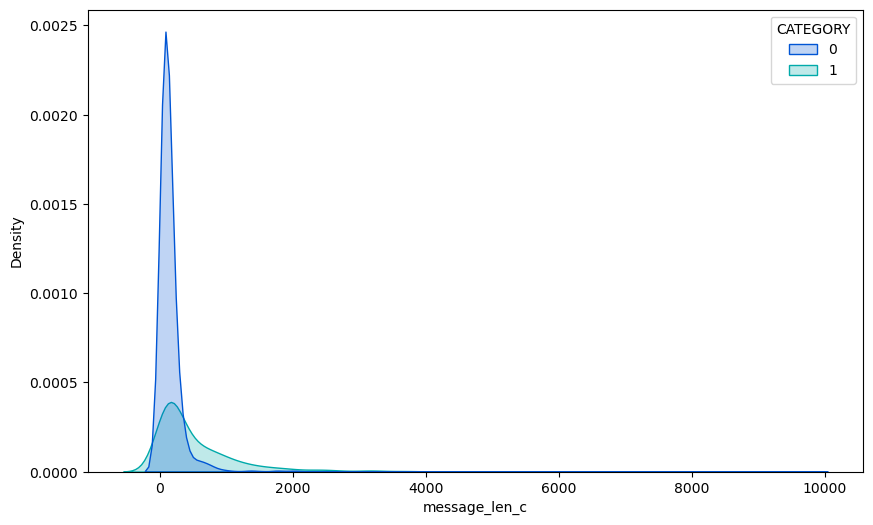

In [26]:
plt.figure(figsize = (10, 6))
sns.kdeplot(x = data_train['message_len_c'], hue= data_train['CATEGORY'], palette= 'winter', shade = True)
plt.show()

In [27]:
data_train =  data_train.drop(['FILE_NAME' , 'message_len', 'message_len_c','clean_msg'], axis=1)
data_test=data_test.drop(['FILE_NAME'], axis=1)

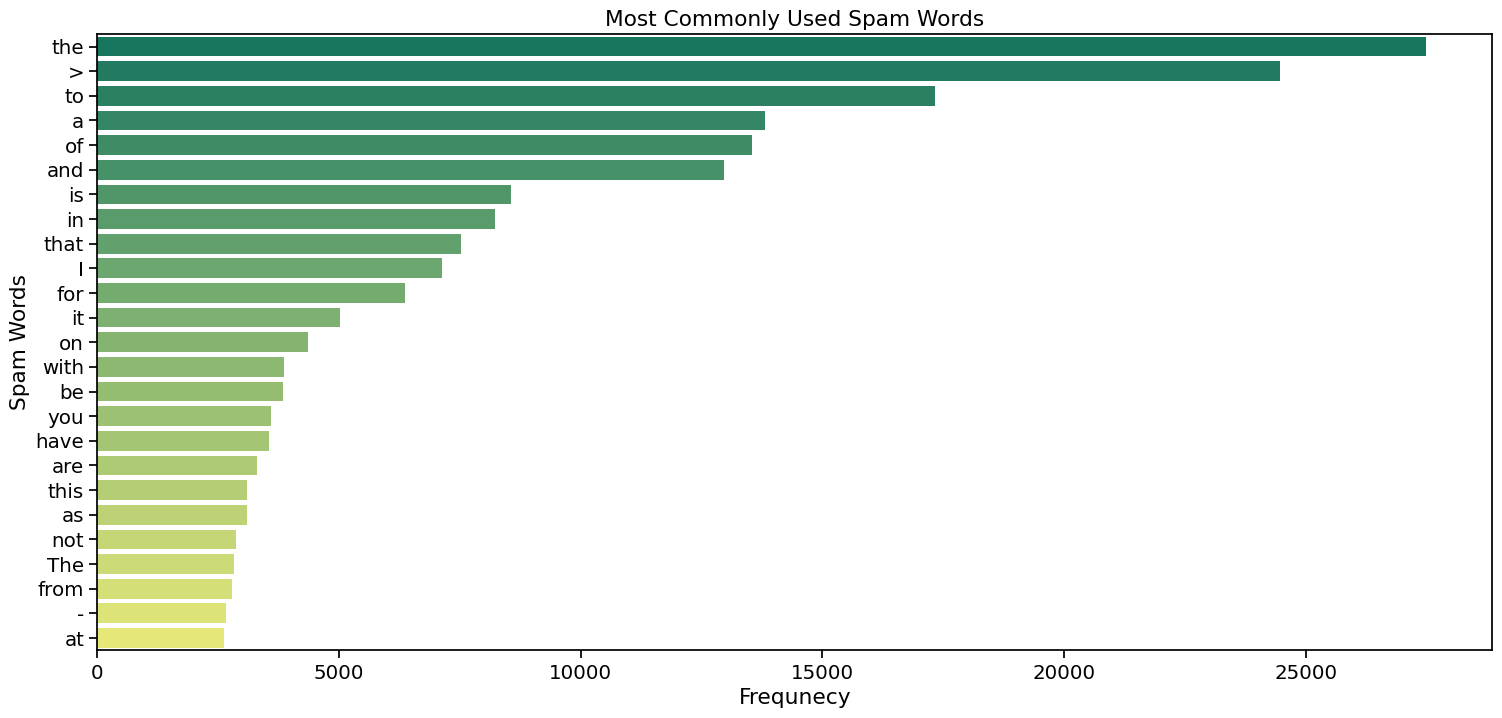

In [28]:
all_spam_words = []
for sentence in data_train[data_train['CATEGORY'] == 0]['MESSAGE'].to_list():
    for word in sentence.split():
        all_spam_words.append(word)

df = pd.DataFrame(Counter(all_spam_words).most_common(25), columns= ['Word', 'Frequency'])

sns.set_context('notebook', font_scale= 1.3)
plt.figure(figsize=(18,8))
sns.barplot(y = df['Word'], x= df['Frequency'], palette= 'summer')
plt.title("Most Commonly Used Spam Words")
plt.xlabel("Frequnecy")
plt.ylabel("Spam Words")
plt.show()


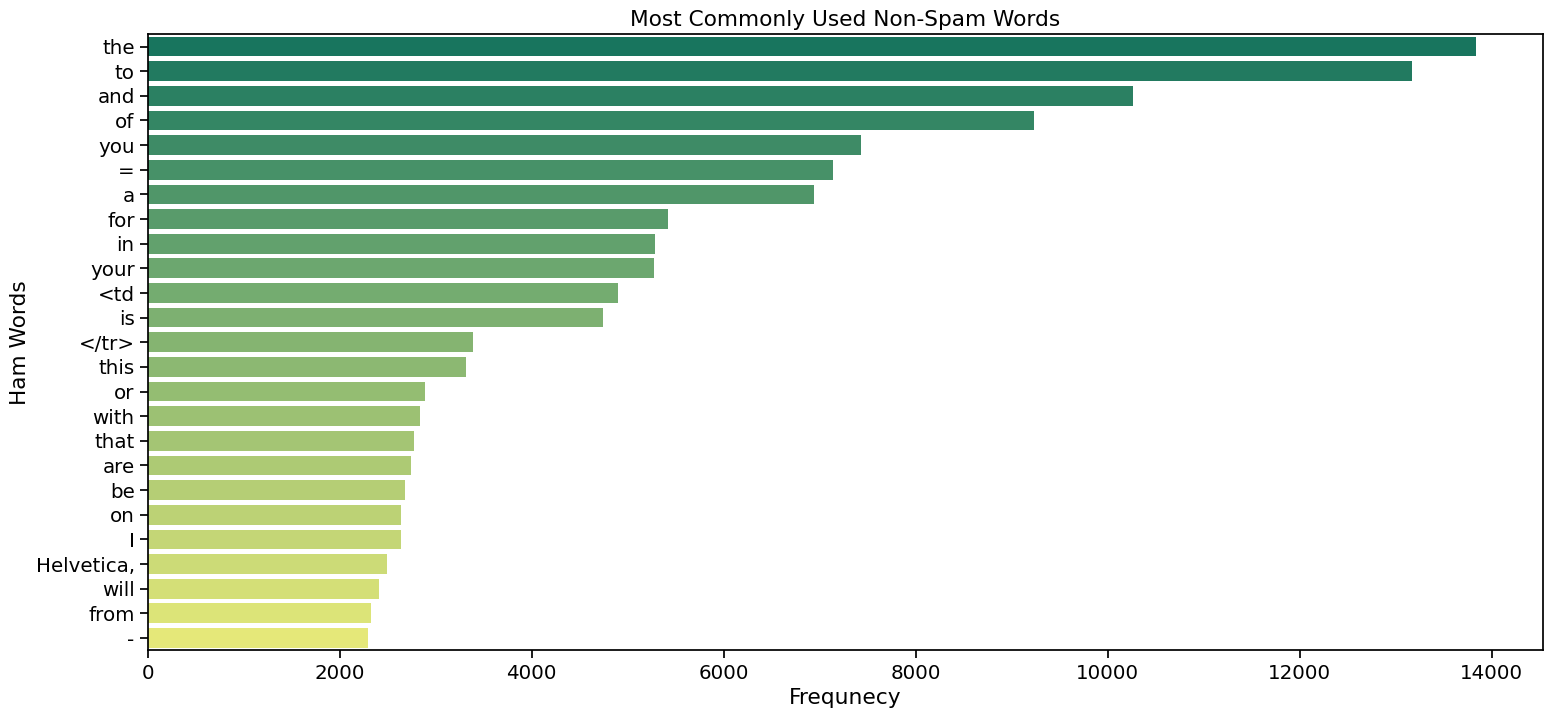

In [29]:
all_ham_words = []
for sentence in data_train[data_train['CATEGORY'] == 1]['MESSAGE'].to_list():
    for word in sentence.split():
        all_ham_words.append(word)

df = pd.DataFrame(Counter(all_ham_words).most_common(25), columns= ['Word', 'Frequency'])

sns.set_context('notebook', font_scale= 1.3)
plt.figure(figsize=(18,8))
sns.barplot(y = df['Word'], x= df['Frequency'], palette= 'summer')
plt.title("Most Commonly Used Non-Spam Words")
plt.xlabel("Frequnecy")
plt.ylabel("Ham Words")
plt.show()

In [30]:
counter

{'html': 4175,
 'font': 35005,
 'back': 1055,
 'ffffff': 2535,
 'style': 3349,
 'background': 789,
 'color': 9642,
 'size': 13107,
 '3': 3581,
 'ptsize': 450,
 '12': 985,
 'b': 12856,
 'viagra': 66,
 '000000': 1923,
 '2': 7993,
 '10': 2182,
 'family': 1491,
 'sansserif': 314,
 'face': 9950,
 'arial': 6187,
 'lang': 419,
 '0': 9445,
 'br': 16013,
 'breakthrough': 22,
 'medication': 50,
 'impotence': 13,
 'delivered': 79,
 'mailbox': 71,
 'without': 658,
 'leaving': 50,
 'computer': 640,
 'simply': 377,
 'click': 2144,
 'href': 3875,
 'http': 14926,
 'host': 158,
 '1bulk': 12,
 'email': 4015,
 'software': 1129,
 'com': 11675,
 'ch4': 12,
 'pharm': 12,
 'blue': 181,
 'le': 680,
 '5': 2932,
 'minute': 366,
 'complete': 403,
 'line': 1307,
 'consultation': 68,
 'many': 1004,
 'case': 681,
 '24': 575,
 'nbsp': 9732,
 'hour': 589,
 'gt': 108,
 'website': 488,
 'treatment': 33,
 'compromised': 12,
 'sexual': 120,
 'function': 202,
 'convenient': 36,
 'affordable': 55,
 'confidential': 135,
 's

In [31]:
def high_num_token(token, threshold):
    if token not in counter:
        return False
    else:
        return counter[token] > threshold


In [32]:
#freq_tokens : 
features = [token for token in counter if high_num_token(token, 10000)]
features

['font', 'size', 'b', 'br', 'http', 'com', 'p', 'tr', 'td', '3d']

In [33]:
token_index = {t: i for i, t in enumerate(features)}
token_index

{'font': 0,
 'size': 1,
 'b': 2,
 'br': 3,
 'http': 4,
 'com': 5,
 'p': 6,
 'tr': 7,
 'td': 8,
 '3d': 9}

# Feature extraction : 

In [34]:
#Vectorization :

In [35]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(vocabulary=features)

def Count_Vectorization (msg):
   
    count_vector = vectorizer.transform([msg]).toarray()
    count_vector = count_vector.flatten()

    return count_vector


In [36]:
# la ligne qui a plusieur 1 est un spam , qui a la redances de liste counter 

In [37]:
def convert_data(data):
    y = data['CATEGORY'].to_numpy().astype(int)
    column = data['MESSAGE']
    count_vectors = []
    for msg in column:
        count_vector = Count_Vectorization(msg)
        count_vectors.append(count_vector)
    X = np.array(count_vectors).astype(int)

    return X, y

In [38]:
X_train, y_train = convert_data(data_train)
X_test, y_test = convert_data(data_test)

COLUMN=["CATECORY"] 
y_test=pd.DataFrame(data=y_test,columns=COLUMN)
y_train=pd.DataFrame(data=y_train,columns=COLUMN)


In [39]:
COLUMNS= ['font', 'size', 'b', 'br', 'http', 'com', 'p', 'tr', 'td', '3d']

In [40]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
scaled_data_train= scaler.fit_transform(X_train)
scaled_data_test= scaler.fit_transform(X_test)


X_train = pd.DataFrame(data=scaled_data_train,columns=COLUMNS)
X_test = pd.DataFrame(data=scaled_data_test,columns=COLUMNS)


In [41]:
X_train.head()

,font,size,b,br,http,com,p,tr,td,3d
0,4.0,2.0,0.0,33.0,2.5,2.666667,0.0,0.0,0.0,0.0
1,14.0,7.0,0.0,22.0,0.5,0.333333,0.0,1.0,4.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.5,0.333333,0.0,0.0,0.0,0.0


#  MODELING :



In [42]:
from sklearn.metrics import accuracy_score, confusion_matrix,precision_recall_fscore_support, classification_report, roc_curve, auc



def evaluate_model(model, X_train, y_train, X_test, y_test):
    
    model.fit(X_train, y_train)

    #4. predictions on the test set
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Evaluating the model on the test set
    acc_train = accuracy_score(y_train, y_pred_train)
    acc_test = accuracy_score(y_test, y_pred_test)

    conf_matrix = confusion_matrix(y_test, y_pred_test)
    report = classification_report(y_test, y_pred_test)

    # Calculate precision, recall, and F1-score for each class
    precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred_test, average='weighted')

    print("Model Evaluation:")
    print("Accuracy on Train Set:", acc_train)
    print("Accuracy on Test Set:", acc_test)
    print("Precision (weighted):", precision)
    print("Recall (weighted):", recall)
    print("F1-Score (weighted):", f1_score)
    print("Classification Report:\n", report)

    # Plotting the confusion matrix
    plot_confusion_matrix(conf_matrix)

def plot_confusion_matrix(conf_matrix):
    plt.figure(figsize=(8, 6))
   
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
    plt.xlabel('Predictions')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()


##  Logistic Regression


Model Evaluation:
Accuracy on Train Set: 0.8313201035375324
Accuracy on Test Set: 0.8327586206896552
Precision (weighted): 0.8618325570821147
Recall (weighted): 0.8327586206896552
F1-Score (weighted): 0.8133959545945227
Classification Report:
               precision    recall  f1-score   support

           0       0.80      1.00      0.89       788
           1       0.98      0.49      0.65       372

    accuracy                           0.83      1160
   macro avg       0.89      0.74      0.77      1160
weighted avg       0.86      0.83      0.81      1160



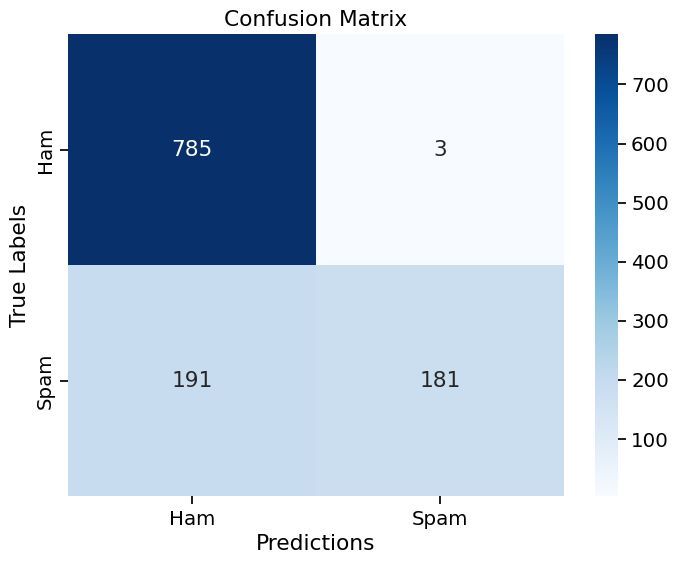

In [43]:
from sklearn.linear_model import LogisticRegression
log_reg_model = LogisticRegression()

evaluate_model(log_reg_model, X_train, y_train, X_test, y_test)

##  Random Forest : 


Model Evaluation:
Accuracy on Train Set: 0.8556945642795514
Accuracy on Test Set: 0.8405172413793104
Precision (weighted): 0.8502680460477128
Recall (weighted): 0.8405172413793104
F1-Score (weighted): 0.8284196074234895
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.97      0.89       788
           1       0.90      0.56      0.69       372

    accuracy                           0.84      1160
   macro avg       0.86      0.77      0.79      1160
weighted avg       0.85      0.84      0.83      1160



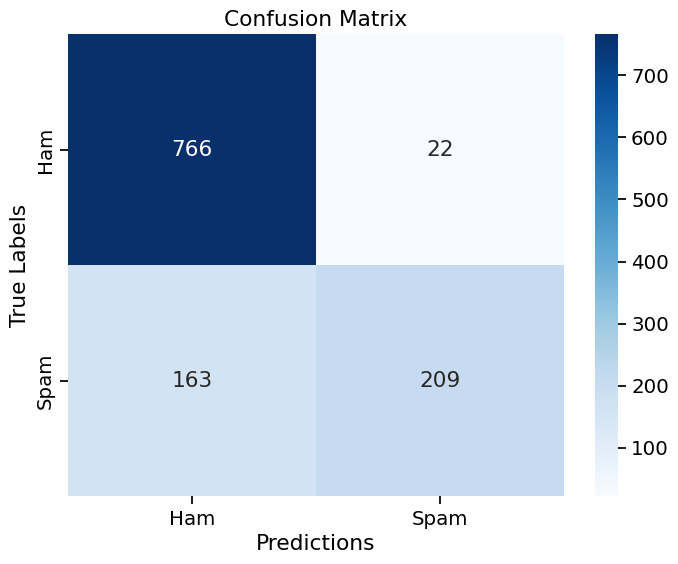

In [44]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
evaluate_model(rf_model, X_train, y_train, X_test, y_test)


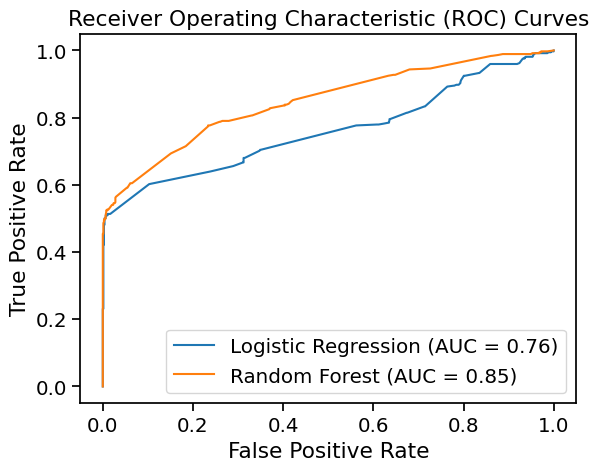

In [45]:
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train, y_train)

random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train, y_train)

fpr_lr, tpr_lr, _ = roc_curve(y_test, logistic_regression_model.predict_proba(X_test)[:, 1])
roc_auc_lr = auc(fpr_lr, tpr_lr)

fpr_rf, tpr_rf, _ = roc_curve(y_test, random_forest_model.predict_proba(X_test)[:, 1])
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')

plt.legend(loc='lower right')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()